In [74]:
import os
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [104]:
class KeemPlot:
    def __init__(self, path, max_value=4095, threshold=500):
        self._max_value = max_value
        self._threshold = threshold
        self.Raw_Arrays = self._gen_raw_arrays(path)
        self.flatdata, self.barcodes = self._get_codes(self.Raw_Arrays)

    def _gen_raw_arrays(self, path):
        image_names = os.listdir(path)
        Raw_Images = []
        for i, name in enumerate(image_names):
            Raw_Images.append(io.imread(path+name)[:,:,0])

        return Raw_Images
    
    def _interp1d(self, array, new_len):
        la = len(array)
        return np.interp(np.linspace(0, la - 1, num=new_len), np.arange(la), array)
    
    def _get_codes(self, Raw_data):

        flatdata = []
        barcodes = []

        for i, image in enumerate(Raw_data):
            arr = image.max(axis=0)
            arr[arr<self._threshold]=0   #Threshold out noise/unwanted dim signal.
            arr = arr/self._max_value    #Normalize to values between 0 and 1.
            final = self._interp1d(arr, 10000)
            flatdata.append(final)
            barcodes.append(np.vstack([final for i in range(500)]))

        return flatdata, barcodes
    
    def plot_barcodes(self, barcodes, save=None):

        fig, axes = plt.subplots(len(barcodes), 1, constrained_layout=True)

        for i, bar in enumerate(barcodes):
            axes[i].imshow(bar, cmap="Greys_r", vmin = 0, vmax=1.0)
            axes[i].axis("off")

        fig.subplots_adjust(wspace=0,hspace=0, bottom=0)
        
        if save is not None:
            fig.savefig(save, dpi=1200)


In [76]:
dir1 = KeemPlot(path1)

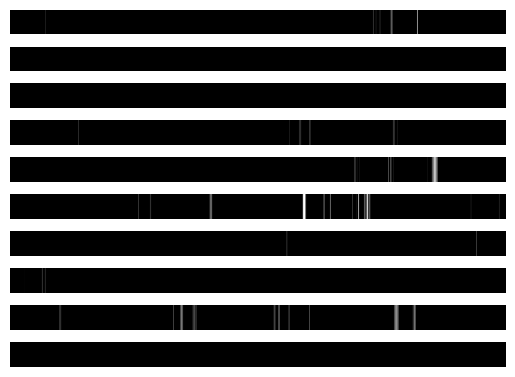

In [77]:
dir1.plot_barcodes(dir1.barcodes)

In [78]:
path1 = "E:/MY_DATASETS/01_LIVE_BACTERIAL_IMAGING/230408/Jub66_RFP/"
path2 = "E:/MY_DATASETS/01_LIVE_BACTERIAL_IMAGING/test1/Slide_1/READY_TO_READ/"
path3 = "E:/MY_DATASETS/01_LIVE_BACTERIAL_IMAGING/test1/Slide_2/READY_TO_READ/"

In [79]:
dir1 = KeemPlot(path1)

In [113]:
dir1 = KeemPlot(path1, threshold=750)
dir2 = KeemPlot(path2, threshold=750)
dir3 = KeemPlot(path3, threshold=750)

codes = [*dir1.barcodes, *dir2.barcodes, *dir3.barcodes]


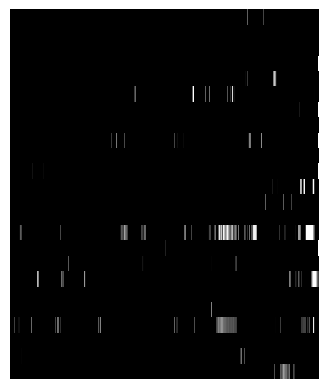

In [114]:
dir.plot_barcodes(codes, save="./images/poster.svg")

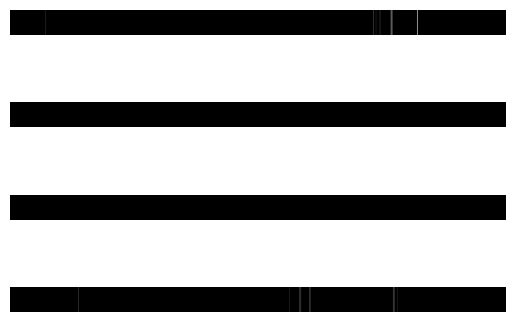

In [105]:
dir.plot_barcodes(codes[0:4], save="./images/poster3.svg")

In [82]:
pops = [1, 2, 8, 9, 12]

In [83]:
for i in pops:
    codes.pop(i)

In [86]:
all_data = [*dir1.flatdata, *dir2.flatdata, *dir3.flatdata]
print(len(all_data))
#all_data.pop(14)
print(len(all_data))

24
24


In [87]:
for i in pops:
    all_data.pop(i)

In [88]:
len(all_data)

19

In [89]:
avg = sum(all_data) / np.sqrt(len(all_data))

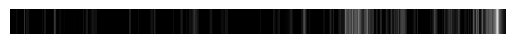

In [90]:
plt.imshow(np.vstack([avg for i in range(500)]), cmap="Greys_r", vmin = 0, vmax = 1.0)
plt.axis("off");

plt.savefig("./images/poster2.svg", dpi=1200)

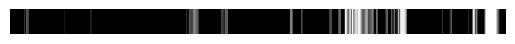

In [60]:
plt.imshow(dir2.barcodes[4], cmap="Greys_r", vmin = 0, vmax=1.0)
plt.axis("off")

plt.savefig("./images/presfig.svg")

In [99]:
dir4 = KeemPlot("E:/MY_DATASETS/01_LIVE_BACTERIAL_IMAGING/230408/Jub66_RFP_IN_CEMBIO/", threshold=750)

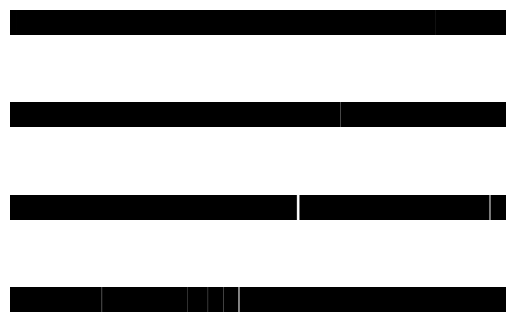

In [109]:
dir4.plot_barcodes(dir4.barcodes, save="./images/poster_cb.svg")

In [107]:
avg2 = sum(dir4.flatdata) / 2

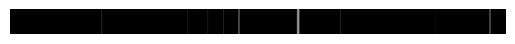

In [108]:
plt.imshow(np.vstack([avg2 for i in range(500)]), cmap="Greys_r", vmin = 0, vmax = 1.0)
plt.axis("off");

plt.savefig("./images/poster_cbavg.svg", dpi=1200)